In [2]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Sample t-test for testing for the differences in means: Independent t-test
Load and explore the data.

Average body fat perecntage vary by age and fitness level.  A sample of people who work out at a gym three times a week for 1 year were measured for body fat. 

If given the sample data below, the summary data, and informaation on the distributions of the samples, use the appropriate statistical est to test if body fat percentage is the same between men and women.  

In [3]:
Men=pd.Series([13.3,6,20,8,14,19,18,25,16,24,15,1,15])
Women=pd.Series([22,16,21.7,21,30,26,12,23.2,28,23])

In [4]:
Men.describe()

count    13.000000
mean     14.946154
std       6.842589
min       1.000000
25%      13.300000
50%      15.000000
75%      19.000000
max      25.000000
dtype: float64

In [5]:
Women.describe()

count    10.00000
mean     22.29000
std       5.31966
min      12.00000
25%      21.17500
50%      22.50000
75%      25.30000
max      30.00000
dtype: float64

In [6]:
stats.shapiro(Men)

ShapiroResult(statistic=0.9584527015686035, pvalue=0.7296339869499207)

In [7]:
stats.shapiro(Women)

ShapiroResult(statistic=0.9519110918045044, pvalue=0.6911411881446838)

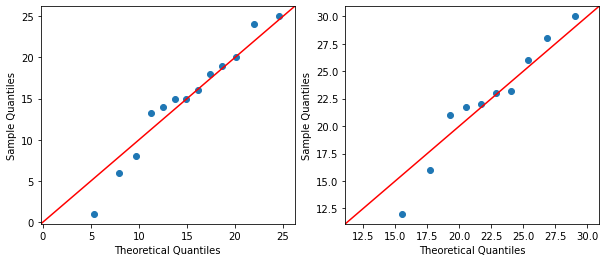

In [8]:
Men.sort_values()
Women.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(Men,line='45',loc=np.mean(Men),scale=np.std(Men),ax=ax2[0])
sm.qqplot(Women,line='45',loc=np.mean(Women),scale=np.std(Women),ax=ax2[1])
plt.show()

In [9]:
stats.levene(Men,Women,center='median')

LeveneResult(statistic=0.5041855321106281, pvalue=0.48547768995474627)

[Text(0, 0, 'Men'), Text(1, 0, 'Women')]

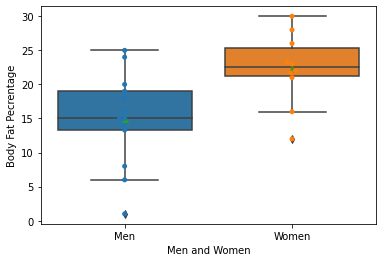

In [10]:
#Plot the data to visualize
ax=sns.boxplot(data=[Men,Women],showmeans=True)
ax.set(xlabel="Men and Women")
ax.set(ylabel="Body Fat Pecrentage")
ax=sns.swarmplot(data=[Men,Women])
ax.set_xticklabels(["Men","Women"])

Symmetrical distributions, noraml in appearance, equal variance in appearance.  

Check assumtions.  Larger than 0.05 p-value means we fail to reject the null hypothesis (that the distribution of the sample is sig different from a normal distribution) and conclude that the sample is not differnt from a normal distribution

We have shown that the two samples are normally distributed using these tests.  Now let's look at the assumption of equal variance (homogeneity of variance or homoscedasticity). Larger than 0.05 p-value measn we fail to reject the null hypthesis and conclude that we accept that the variances are the same.  

Let's look at the normality with qq plots.  

Now let's run the statistical test. We will run the independent samples students's t-test for the difference in means hypothesis test and look at the 95% CI of the difference in means between the samples.  

In [13]:
stats.ttest_ind(Men,Women,equal_var=True)

Ttest_indResult(statistic=-2.799960442832919, pvalue=0.010730607904197957)

Null hypthesis= u1=u2 \
Alternative hypothesis = u1 $\neq$ u2

alpha level = 0.05, two sided test

test statistic = 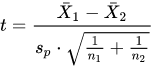 

               = -7.344 /(s(pooled)*sqrt(1/13+1/10))
               
               = -7.344 / (6.236 * sqrt (1/13+1/10))
               
               = -7.344 / (6.236 * 0.421) = -7.344 / (2.625) = -2.798

critical t = t at dof= n1+n2-2 =13+10-2=21 and at 1-alpha/2 = 2.080\
Go to the t-table and find the 0.975 probability at dof=21; t=2.080

If the |test statistic| is more extreme than the critical value, then you have a significant differnce. 

The p-value is found at the probability of being at or more exteme than the test statistic, doubled for the 2-tailed test. 

Go to the t-table and find the probability at or below t=-2.798 at dof=21. This is between 0.01 and 0.005, so dobling this for a two tailed test is between 0.02 and 0.01.  The exact p-value is 00054.  

In [29]:
np.mean(Men)- np.mean(Women)

-7.343846153846153

We will calculate a pooled estimate of the combined standard deviations, which is a weighted average of the two standard deviations, used when the variances are equivalent to each other \
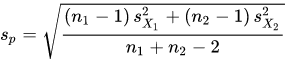

In [15]:
s_pooled=np.sqrt((((13-1)*np.std(Men,ddof=1)**2)+((10-1)*np.std(Women,ddof=1)**2))/(13+10-2))
s_pooled

6.235617003466411

In [16]:
stats.t.ppf(0.975,21)

2.079613844727662

In [17]:
stats.t.cdf(-2.798,21)

0.005388936286912154

In [18]:
2*(stats.t.cdf(-2.798,21))

0.010777872573824308

Find the 95% CI of the differnce in means

In [19]:
cm=sm.stats.CompareMeans(sm.stats.DescrStatsW(Men),sm.stats.DescrStatsW(Women))
print(cm.tconfint_diff(usevar='pooled'))

(-12.798338975050555, -1.8893533326417513)


In [20]:
LB=(np.mean(Men)-np.mean(Women) - 2.080*s_pooled* (np.sqrt(1/13 + 1/10)))
UB=(np.mean(Men)-np.mean(Women) + 2.080*s_pooled* (np.sqrt(1/13 + 1/10)))
print(LB)
print(UB)

-12.799351798256254
-1.888340509436051


Interpretation:  the confidence interval for meanA-meanB (the difference in sample means) does not cross 0 and has a positive range of values.  The shows that mean A is greater than mean B, and that the difference in means is statistically significant at the 95% confidence level, with p=0.0108.  We reject our null hypothesis and accept that there is a differnece in body fat ercentage between men and women. 

# Power and Sample Size

power = probability (-z (at sig. level 1 - alpha/2) + ES) \

Find the power of the independent 2-sample ttest with ES equal to that above, assuming that the sample sizes are equal  , using the z-table calculation.  

ES = |difference in sample means| / std

If you assume equal variance between samples:  the pooled standard deviation is the appropriate estimate of the standard deviation.  
s(pooled) = 6.236

ES = 7.344/(6.236)  = 1.178

power= probability (-1.96 + 1.178) = (-0.782) = 0.217

1-0.217 = 0.783 = 78.3% power

In [22]:
stats.norm.ppf(0.975)

1.959963984540054

In [23]:
stats.norm.cdf(-.782)

0.2171072867953034

In [24]:
stats.norm.cdf(0.782)

0.7828927132046966

In [25]:
import statsmodels.stats.power as smp
smp.zt_ind_solve_power(effect_size=(-7.344/6.236),alpha=0.05, nobs1=13,ratio=0.769,alternative='two-sided')

0.799447443570809

Sample size calculation 

n = 2* standard deviation ^2 * (z at 1-alpha + z at 1-beta)^2 / (mean1-mean2)^2

estimate of difference= 7.344\
standard deviation = 6.236, assume equal variance \
alpha =0.05 \
beta= 0.10, power = 0.9 \
z at 1-aplha/2 for 2-sided test = 1.96 \
z at 0.90 = 1.282

n = 2* 6.236^2 * (1.96+1.282)^2 / 7.344^2 \
  = 2 * 38.888 * (3.242)^2 / 53.934  = 15.157 or 16 per sample group for equal sample sizes.

In [26]:
stats.norm.ppf(.9)

1.2815515655446004

In [27]:
smp.zt_ind_solve_power(effect_size=(-7.344/6.236),alpha=0.05,power=0.9,ratio=1,alternative='two-sided')

15.152105691268526

In [28]:
smp.zt_ind_solve_power(effect_size=(-7.344/6.236),alpha=0.05,power=0.9,ratio=0.769,alternative='two-sided')

17.42787445814293